# Train & Analysis of Baseline Model

In [15]:
import autograd.numpy as ag_np

# Use helper packages
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

# Some packages you might need (uncomment as necessary)
import pandas as pd
import matplotlib.pyplot as plt

from CollabFilterMeanOnly import CollabFilterMeanOnly

In [28]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model = CollabFilterMeanOnly(
    n_epochs=10, batch_size=10000, step_size=0.1)
model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.63800 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     7.03040
epoch       0.143 | loss_total     9.33072 | train_MAE     2.82755 | valid_MAE     2.84200 | grad_wrt_mu     5.68192
epoch       0.286 | loss_total     6.40404 | train_MAE     2.29264 | valid_MAE     2.30556 | grad_wrt_mu     4.53114
epoch       0.429 | loss_total     4.49626 | train_MAE     1.89513 | valid_MAE     1.90551 | grad_wrt_mu     3.57311
epoch       0.571 | loss_total     3.34473 | train_MAE     1.60017 | valid_MAE     1.60872 | grad_wrt_mu     2.88409
epoch       0.714 | loss_total     2.60167 | train_MAE     1.41250 | valid_MAE     1.42006 | grad_wrt_mu     2.33007
epoch       0.857 | loss_total     2.13770 | train_MAE     1.26089 | valid_MAE     1.26765 | grad_wrt_mu     1.89066
epoch       1.000 | loss_total     1.81930 | train_MAE     1.13787 | valid_MAE     1.14397 | grad_wrt_mu     1.47312
epoch       1.143 | loss_total     1.60887 | train_MAE     1.042

In [29]:
final_mu = model.param_dict['mu'][0]
print(f"Final mu = {final_mu}")
print(f"Final Train MAE = {model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {model.trace_mae_valid[-1]}")

Final mu = 3.531814950092181
Final Train MAE = 0.9443227255891536
Final Valid MAE = 0.9445747922700812


In [30]:
test_y = test_tuple[2]
test_yhat = model.predict(test_tuple[0], test_tuple[1], mu=final_mu)
test_mae = ag_np.mean(ag_np.absolute(test_y - test_yhat))
print(f"Final Test MAE = {test_mae}")

Final Test MAE = 0.9456293520325518


In [31]:
epochs = ag_np.array(model.trace_epoch)
epochs_of_interest = ag_np.argwhere(epochs >= 2.0)
# epochs[epochs_of_interest]

In [32]:
train_loss = ag_np.array(model.trace_mae_train)[epochs_of_interest]
valid_loss = ag_np.array( model.trace_mae_valid)[epochs_of_interest]

Text(0.5, 1.0, 'Baseline Model Loss over Epochs, Batch Size = 10000')

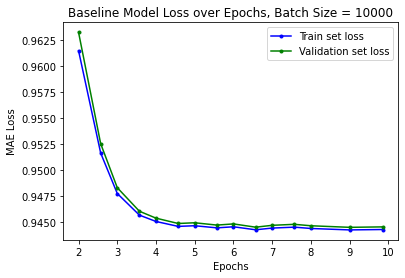

In [33]:
plt.plot( epochs[epochs_of_interest], train_loss, 'b.-', label='Train set loss')
plt.plot( epochs[epochs_of_interest], valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Baseline Model Loss over Epochs, Batch Size = 10000')

## Baseline Model, Batch size = 100

In [34]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model = CollabFilterMeanOnly(
    n_epochs=10, batch_size=100, step_size=0.1)
model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.41000 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     7.02000
epoch       0.001 | loss_total     9.65436 | train_MAE     2.82859 | valid_MAE     2.84304 | grad_wrt_mu     5.81600
epoch       0.003 | loss_total     6.51272 | train_MAE     2.28179 | valid_MAE     2.29464 | grad_wrt_mu     4.57280
epoch       0.004 | loss_total     4.21487 | train_MAE     1.88062 | valid_MAE     1.89091 | grad_wrt_mu     3.55824
epoch       0.126 | loss_total     1.22742 | train_MAE     0.95181 | valid_MAE     0.95272 | grad_wrt_mu     0.51310
epoch       0.250 | loss_total     1.14284 | train_MAE     0.93184 | valid_MAE     0.93099 | grad_wrt_mu     0.37114
epoch       0.376 | loss_total     1.27709 | train_MAE     0.94347 | valid_MAE     0.94365 | grad_wrt_mu     0.21898
epoch       0.500 | loss_total     1.54991 | train_MAE     0.94859 | valid_MAE     0.94922 | grad_wrt_mu     0.00558
epoch       0.626 | loss_total     0.87029 | train_MAE     0.946

In [35]:
final_mu = model.param_dict['mu'][0]
print(f"Final mu = {final_mu}")
print(f"Final Train MAE = {model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {model.trace_mae_valid[-1]}")

Final mu = 3.5822567910722225
Final Train MAE = 0.9431055961662814
Final Valid MAE = 0.9432503384009596


In [36]:
test_y = test_tuple[2]
test_yhat = model.predict(test_tuple[0], test_tuple[1], mu=final_mu)
test_mae = ag_np.mean(ag_np.absolute(test_y - test_yhat))
print(f"Final Test MAE = {test_mae}")

Final Test MAE = 0.9415536512813646


In [37]:
epochs = ag_np.array(model.trace_epoch)
epochs_of_interest = ag_np.argwhere(epochs >= 2.0)
#epochs[epochs_of_interest]

In [38]:
train_loss = ag_np.array(model.trace_mae_train)[epochs_of_interest]
valid_loss = ag_np.array( model.trace_mae_valid)[epochs_of_interest]

Text(0.5, 1.0, 'Baseline Model Loss over Epochs, Batch Size = 100')

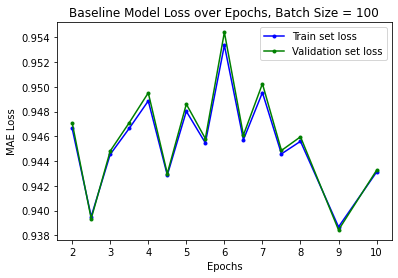

In [39]:
plt.plot( epochs[epochs_of_interest], train_loss, 'b.-', label='Train set loss')
plt.plot( epochs[epochs_of_interest], valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Baseline Model Loss over Epochs, Batch Size = 100')

## Short answer 1b - closed-form operation applied to the training set to compute the optimal mu value

In [14]:
train_y = train_tuple[2]
avg_rating = ag_np.mean(train_y)
avg_rating

3.5305857142857144